In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import requests

In [43]:
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = requests.get(url)
    print(resp.status_code)
    img = np.asarray(bytearray(resp.content), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

In [44]:
def rotate_image(img):
    M = cv2.getRotationMatrix2D((130, 400), -27, 1.0)
    img2 = cv2.warpAffine(img, M, (1280, 720))
    return img2

In [45]:
def fix_persepective(img):
    pts1 = np.float32([[138,432],[167,521],[708,407],[709,517]])
    pts2 = np.float32([[140,430],[140,520],[706,430],[706,520]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    img2 = cv2.warpPerspective(img, M, (1280, 728))
    return img2

In [46]:
def crop_image(img):
    img2 = img[406:536,120:730]
    return img2

200


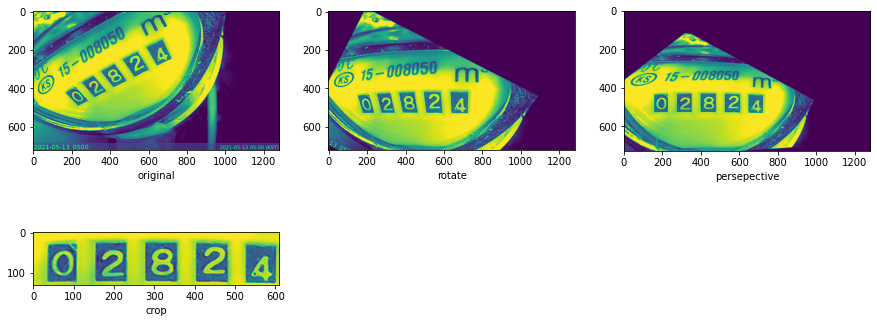

In [47]:
if __name__ == "__main__":
    #img = cv2.imread('2021-01-08_0000.jpg',  cv2.IMREAD_GRAYSCALE)
    img = []
    img.append(url_to_image('http://54.180.106.144:8080/websensor'))
    img.append(rotate_image(img[0]))
    img.append(fix_persepective(img[1]))
    img.append(crop_image(img[2]))

    label = ("original", "rotate", "persepective", "crop")
    plt.figure(figsize=(15,6))
    for i in range(4):
        plt.subplot(2,3,i+1)
        plt.imshow(img[i])
        plt.xlabel(label[i])
    plt.show()